In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df=pd.read_csv("train_imbalanced.csv")

In [79]:
df[:2]

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

In [81]:
df.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

In [82]:
df1=pd.read_csv("test_imbalanced.csv")

In [83]:
df1[:2]

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000


In [84]:
df['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [85]:
a=np.asarray(df['income_level']==-50000)

In [86]:
unique, counts = np.unique(a, return_counts=True)

w=np.asarray((unique, counts)).T

In [87]:
df['income_level']=df['income_level'].replace(['-50000'], '0')


(array([28718., 27274., 23321., 28842., 27970., 21454., 14575., 13245.,
         9476.,  4648.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

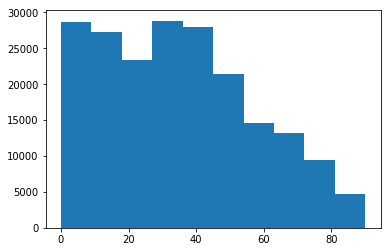

In [96]:
plt.hist(df['age'])
#sns.kdeplot(df['age'])

(array([1.95667e+05, 5.10000e+01, 6.80000e+01, 1.22600e+03, 1.96500e+03,
        4.38000e+02, 5.30000e+01, 1.40000e+01, 7.00000e+00, 3.40000e+01]),
 array([   0. ,  460.8,  921.6, 1382.4, 1843.2, 2304. , 2764.8, 3225.6,
        3686.4, 4147.2, 4608. ]),
 <a list of 10 Patch objects>)

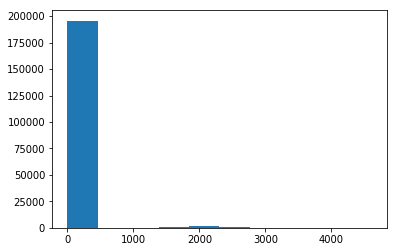

In [98]:
plt.hist(df['capital_losses'])

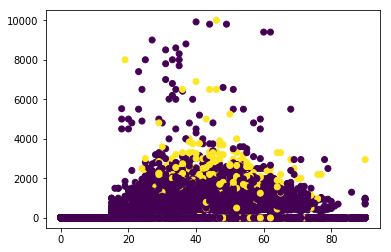

In [102]:
plt.scatter(x=df['age'],y=df['wage_per_hour'],c=df['income_level'])

In [105]:
cat_df = df.select_dtypes(include=['object']).copy()

In [221]:
num_df=df.select_dtypes(include=['int64']).copy()

In [222]:
#df.dtypes

In [223]:
cat_df['education'].value_counts()

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

In [224]:
a=df['education'].groupby(df['income_level'])
a.describe()

,count,unique,top,freq
income_level,,,,
-50000,187141,17,Children,47422
50000,12382,16,Bachelors degree(BA AB BS),3915


In [225]:
num_df.isnull().sum()

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

In [226]:
cat_df.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
dtype: int64

In [227]:
import numpy as np

# Create correlation matrix
corr_matrix = num_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
#num_df.drop(num_df.columns[to_drop], axis=1)

In [228]:
num_df=num_df.drop('weeks_worked_in_year',axis=1)

In [229]:
(cat_df.isnull().sum()/(len(cat_df))*100>5)

class_of_worker                     False
education                           False
enrolled_in_edu_inst_lastwk         False
marital_status                      False
major_industry_code                 False
major_occupation_code               False
race                                False
hispanic_origin                     False
sex                                 False
member_of_labor_union               False
reason_for_unemployment             False
full_parttime_employment_stat       False
tax_filer_status                    False
region_of_previous_residence        False
state_of_previous_residence         False
d_household_family_stat             False
d_household_summary                 False
live_1_year_ago                     False
family_members_under_18             False
country_father                      False
country_mother                      False
country_self                        False
citizenship                         False
fill_questionnaire_veteran_admin  

In [251]:
#cat_df=cat_df.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'],axis=1)

In [ ]:
cat_df.isnull().sum()/(len(cat_df))*100

In [ ]:
cat_df['country_self']=cat_df['country_self'].fillna(value='unavailable')
cat_df['country_mother']=cat_df['country_mother'].fillna(value='unavailable')
cat_df['country_father']=cat_df['country_father'].fillna(value='unavailable')
cat_df['state_of_previous_residence']=cat_df['state_of_previous_residence'].fillna(value='unavailable')
cat_df['hispanic_origin']=cat_df['hispanic_origin'].fillna(value='unavailable')

In [231]:
cat_df.isnull().sum()/(len(cat_df))*100

class_of_worker                     0.0
education                           0.0
enrolled_in_edu_inst_lastwk         0.0
marital_status                      0.0
major_industry_code                 0.0
major_occupation_code               0.0
race                                0.0
hispanic_origin                     0.0
sex                                 0.0
member_of_labor_union               0.0
reason_for_unemployment             0.0
full_parttime_employment_stat       0.0
tax_filer_status                    0.0
region_of_previous_residence        0.0
state_of_previous_residence         0.0
d_household_family_stat             0.0
d_household_summary                 0.0
live_1_year_ago                     0.0
family_members_under_18             0.0
country_father                      0.0
country_mother                      0.0
country_self                        0.0
citizenship                         0.0
fill_questionnaire_veteran_admin    0.0
dtype: float64

In [232]:
#Binning of Ages

In [233]:
num_df['age'] = pd.cut(x=num_df['age'], bins=[0,30, 60, 90], labels=['young', 'adult', 'old'])

In [234]:
num_df['income_level']=num_df['income_level'].replace(to_replace=50000,value="1")
num_df['income_level']=num_df['income_level'].replace(to_replace=-50000,value="0")

In [235]:
num_df['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [239]:
import imblearn
from sklearn.model_selection import train_test_split

In [301]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = num_df.income_level
X = num_df.drop(['income_level','year'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

sm = SMOTE(random_state=101, ratio=1.0)
X_train, y_train = sm.fit_sample(X, y)

In [242]:
num_df=num_df.drop(['wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','age'],axis=1)

In [243]:
num_df['income_level']=num_df['income_level'].astype('int64')

In [244]:
num_df.dtypes

industry_code                 int64
occupation_code               int64
num_person_Worked_employer    int64
business_or_self_employed     int64
veterans_benefits             int64
year                          int64
income_level                  int64
dtype: object

In [248]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [250]:
####Similarly under-sampling and over-sampling can too be done

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [303]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [304]:
from sklearn.metrics import jaccard_similarity_score,f1_score,classification_report
jaccard_similarity_score(y_test, yhat)

C:\Users\LENOVO\Anaconda3new\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7107114933541829

In [305]:
f1_score(y_test,yhat)

0.2548796860477125

In [306]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.98      0.71      0.82     46711
           1       0.15      0.78      0.25      3170

    accuracy                           0.71     49881
   macro avg       0.57      0.74      0.54     49881
weighted avg       0.93      0.71      0.78     49881



In [307]:
from xgboost import XGBClassifier

In [308]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [309]:
y_pred = model.predict(X_train)
#predictions = [round(value) for value in y_pred]

In [310]:
print (classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81    187141
           1       0.80      0.85      0.83    187141

    accuracy                           0.82    374282
   macro avg       0.82      0.82      0.82    374282
weighted avg       0.82      0.82      0.82    374282



In [311]:
y_pred = model.predict(X_test.values)
#predictions = [round(value) for value in y_pred]

In [312]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     46711
           1       0.21      0.86      0.34      3170

    accuracy                           0.79     49881
   macro avg       0.60      0.82      0.61     49881
weighted avg       0.94      0.79      0.84     49881



In [313]:
f1_score(y_test,y_pred)

0.3420787083753784

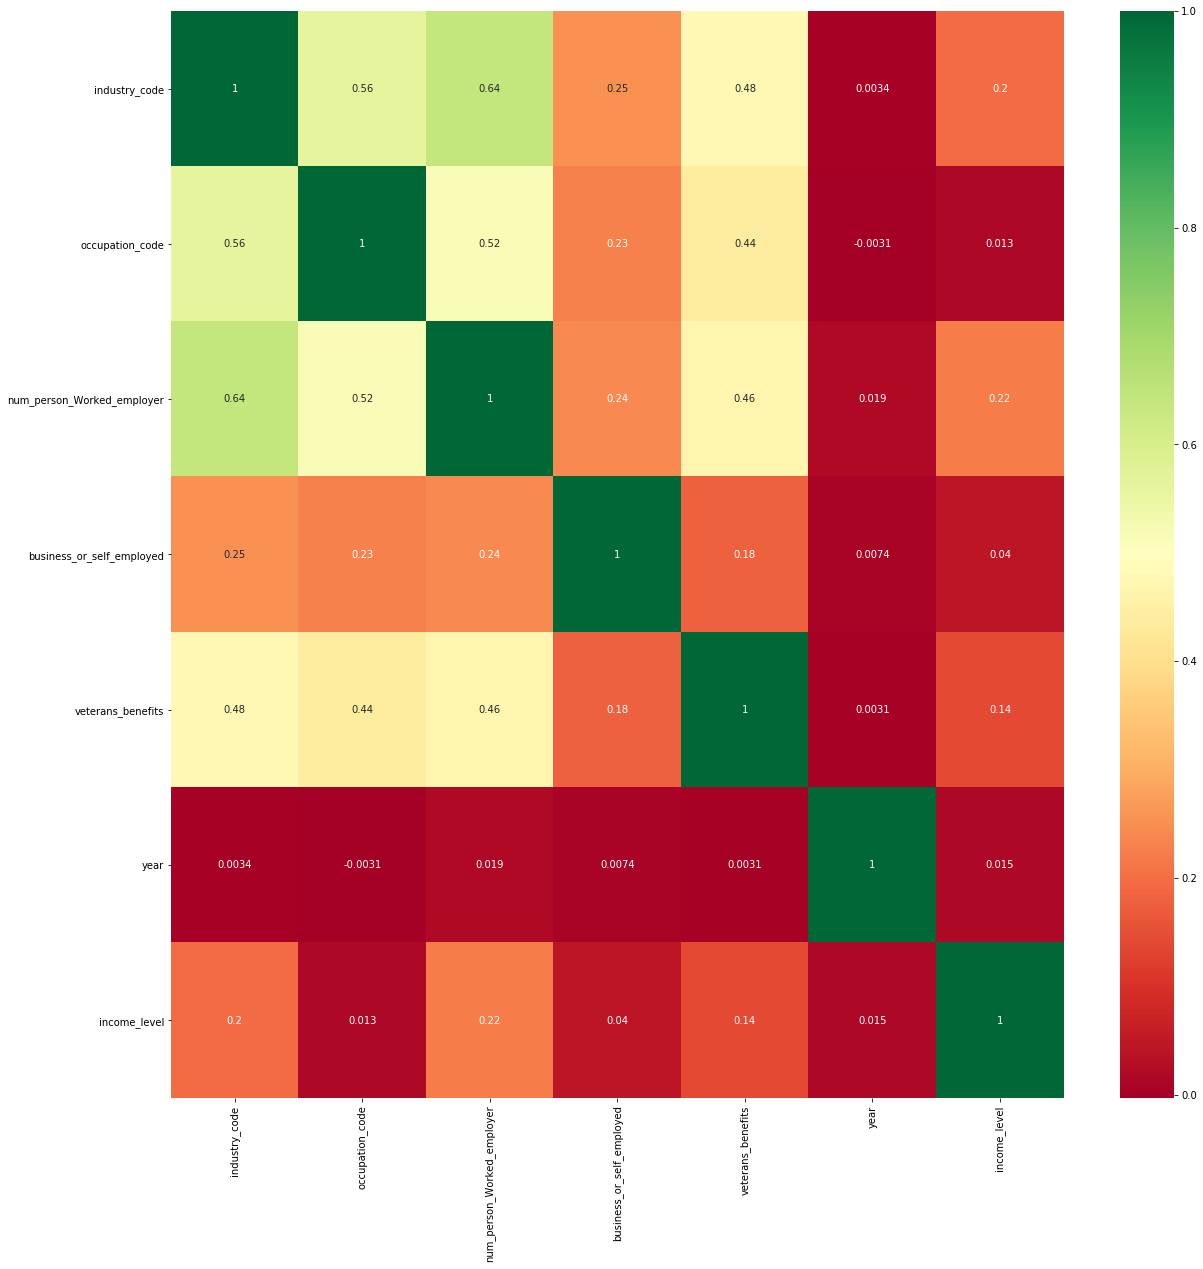

In [283]:
E = num_df.iloc[:,0:6]  #independent columns
f = num_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = num_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(num_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\LENOVO\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.34456029 0.47463883 0.13916335 0.02002989 0.00992988 0.01167776]


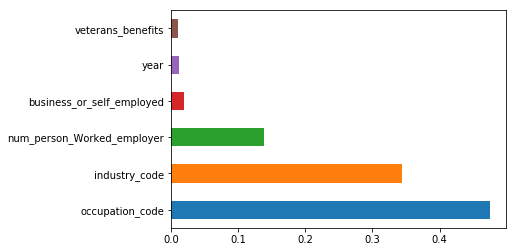

In [284]:
C = num_df.iloc[:,0:6]  #independent columns
d = num_df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(C,d)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=C.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [300]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
A = num_df.iloc[:,0:6]  #independent columns
b = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(A,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 10 best features

                        Specs          Score
0               industry_code  163285.428460
2  num_person_Worked_employer   28292.308626
4           veterans_benefits    1896.591909
1             occupation_code     663.385633
3   business_or_self_employed     571.119727
5                        year       0.115521
